# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

In [23]:
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -51.1,
        "lat": 69.2167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.22,
        "feels_like": 12.22,
        "temp_min": 12.22,
        "temp_max": 12.22,
        "pressure": 1009,
        "humidity": 57
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 120
    },
    "clouds": {
        "all": 96
    },
    "dt": 1635413929,
    "sys": {
        "type": 1,
        "id": 165,
        "country": "GL",
        "sunrise": 1635420550,
        "sunset": 1635446818
    },
    "timezone": -7200,
    "id": 3423146,
    "name": "Ilulissat",
    "cod": 200
}


In [24]:
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for city in cities:

    response = requests.get(query_url + city).json()
    
    try:
        
        city_name.append(response["name"])
   
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        # getting temperature

        main = response['main']
        temperature.append(main['temp_max'])
        # getting the humidity
        humidity.append(main['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
   
        print(f"City Name: {city}")
        
    except:
        print(f"City not Found")
        
        #continue


City Name: atuona
City Name: butaritari
City Name: pasni
City Name: mataura
City Name: nanortalik
City Name: sao joao da barra
City Name: rikitea
City not Found
City Name: vaini
City Name: cidreira
City Name: hithadhoo
City Name: xingyi
City Name: victoria
City Name: lasa
City Name: ushuaia
City Name: soubre
City Name: khatanga
City Name: sao filipe
City Name: cape town
City Name: provideniya
City Name: geraldton
City Name: tuktoyaktuk
City Name: bredasdorp
City Name: jamestown
City Name: mecca
City Name: merauke
City Name: borova
City Name: kokoda
City Name: sarangani
City Name: olavarria
City Name: luderitz
City Name: chokurdakh
City Name: dali
City not Found
City Name: severo-kurilsk
City Name: turukhansk
City not Found
City Name: tiarei
City Name: wenling
City Name: riyadh
City Name: petropavlovsk-kamchatskiy
City Name: albany
City Name: sechelt
City Name: atambua
City Name: qaanaaq
City Name: dikson
City Name: hermanus
City Name: punta arenas
City Name: mar del plata
City Name: hi

City Name: pervoavgustovskiy
City Name: mattru
City Name: alekseyevsk
City Name: rio grande
City Name: tanabe
City Name: ulladulla
City Name: chapleau
City Name: mount vernon
City Name: gualaquiza
City Name: ossora
City Name: nakamura
City Name: mao
City Name: fasa
City not Found
City Name: coahuayana
City Name: navrongo
City not Found
City Name: puteyets
City Name: villarrica
City Name: marsh harbour
City Name: wicklow
City Name: yinchuan
City Name: tingi
City Name: chaves
City not Found
City Name: viedma
City Name: sinop
City Name: souillac
City Name: michigan city
City Name: les cayes
City Name: hounde
City Name: tucuman
City Name: mezen
City Name: nyurba
City Name: ihiala
City Name: omboue
City Name: yerbogachen
City Name: ladario
City Name: grand-santi
City Name: rafaela
City Name: windhoek
City Name: adrar
City Name: korla
City Name: celestun
City Name: dharmadam
City Name: kottagudem
City Name: mount hagen
City Name: plettenberg bay
City Name: rizhao
City Name: saint-joseph
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = {
    "City": city_name,
    "lat": latitude,
    "Lng": longitude,
    "Max Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.10,69,23,15.43,PF,1635413937
1,Butaritari,3.0707,172.7902,81.30,73,100,4.99,KI,1635413724
2,Pasni,25.2631,63.4710,80.20,57,0,10.51,PK,1635413889
3,Mataura,-46.1927,168.8643,54.41,82,94,2.53,NZ,1635413691
4,Nanortalik,60.1432,-45.2371,33.84,77,76,6.96,GL,1635413795


In [29]:
weather_data.to_csv("output_data/cities.csv", index=False, header=True)


In [30]:
weather_data.describe()

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,18.524754,23.935585,60.988356,70.210616,53.020548,7.898801,1.635414e+09
std,33.894784,89.159625,22.366968,21.726631,38.884042,5.716334,1.007055e+02
min,-54.800000,-175.200000,-19.970000,10.000000,0.000000,0.000000,1.635413e+09
25%,-9.695600,-53.537650,46.417500,57.000000,13.000000,3.890000,1.635414e+09
50%,20.509550,26.093700,65.550000,75.000000,56.000000,6.375000,1.635414e+09
75%,47.880375,106.010375,79.370000,87.000000,93.000000,10.680000,1.635414e+09
max,78.218600,179.316700,96.530000,100.000000,100.000000,36.130000,1.635414e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
Humiditydata_df = weather_data["Humidity"]
Humiditydata_df

0      69
1      73
2      57
3      82
4      77
       ..
579    59
580    48
581    50
582    55
583    52
Name: Humidity, Length: 584, dtype: int64

In [32]:
#  Get the indices of cities that have humidity over 100%.
quartiles = Humiditydata_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 57.0
The upper quartile of Humidity is: 87.0
The interquartile range of Humidity is: 30.0
The the median of Humidity is: 75.0 
Values below 12.0 could be outliers.
Values above 132.0 could be outliers.


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = weather_data.drop(weather_data[weather_data['Humidity'] < 12].index, inplace = False)
clean_city_df

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.10,69,23,15.43,PF,1635413937
1,Butaritari,3.0707,172.7902,81.30,73,100,4.99,KI,1635413724
2,Pasni,25.2631,63.4710,80.20,57,0,10.51,PK,1635413889
3,Mataura,-46.1927,168.8643,54.41,82,94,2.53,NZ,1635413691
4,Nanortalik,60.1432,-45.2371,33.84,77,76,6.96,GL,1635413795
...,...,...,...,...,...,...,...,...,...
579,Mbandaka,0.0487,18.2603,85.10,59,90,1.83,CD,1635414116
580,Brits,-25.6347,27.7802,72.82,48,99,9.93,ZA,1635414117
581,Breyten,-26.3018,29.9870,66.36,50,99,5.93,ZA,1635414117
582,Creel,27.7500,-107.6333,46.04,55,0,4.05,MX,1635414117


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

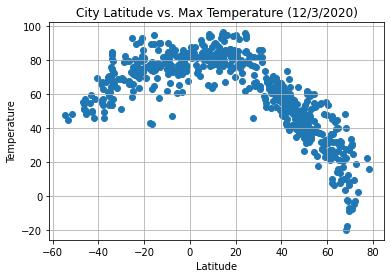

In [41]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature (12/3/2020)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)

plt.savefig('MaxTempPerLat.png')

plt.show()

## Latitude vs. Humidity Plot

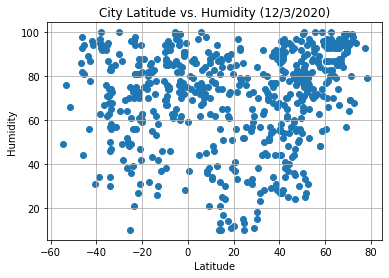

In [44]:
x_values = weather_data['lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (12/3/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

plt.savefig('HumidityPerLat.png')
plt.show()

## Latitude vs. Cloudiness Plot

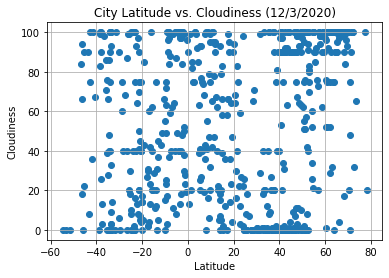

In [45]:
x_values = weather_data['lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (12/3/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

plt.savefig('CloudinessPerLat.png')
plt.show()

## Latitude vs. Wind Speed Plot

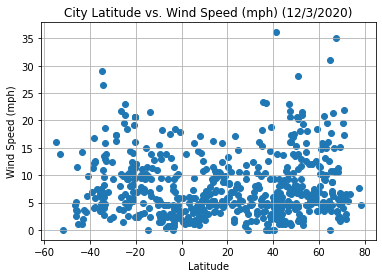

In [47]:
x_values = weather_data['lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (mph) (12/3/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig('WindSpeedPerLat.png')
plt.show()

## Linear Regression

In [48]:
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")

    return regress_values, line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
hem = weather_data['lat'] > 0
nothern_hem = weather_data[hem]
southern_hem = weather_data[-hem]

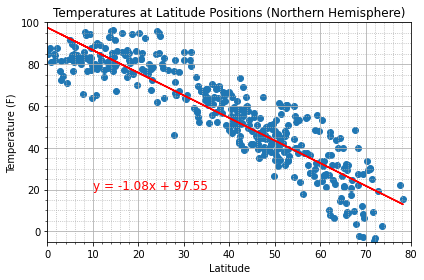

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = nothern_hem["lat"]
y_values = nothern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_temp_regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

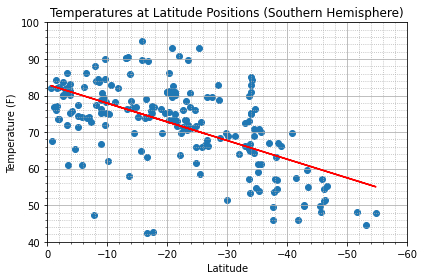

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = southern_hem["lat"]
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

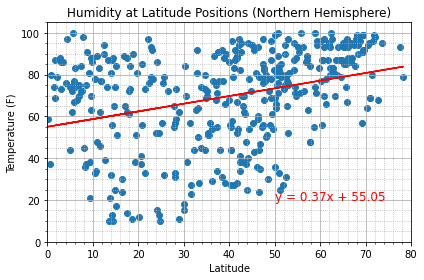

<Figure size 432x288 with 0 Axes>

In [66]:
x_values = nothern_hem["lat"]
y_values = nothern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_humidity_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

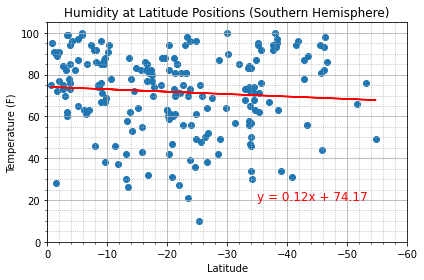

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = southern_hem["lat"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("sh_lat_humidity_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

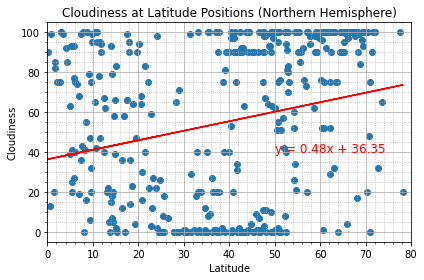

<Figure size 432x288 with 0 Axes>

In [72]:
x_values = nothern_hem["lat"]
y_values = nothern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_cloudiness_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

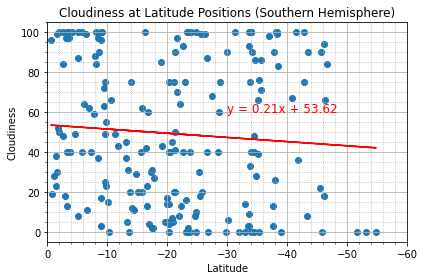

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = southern_hem["lat"]
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("sh_lat_cloudiness_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

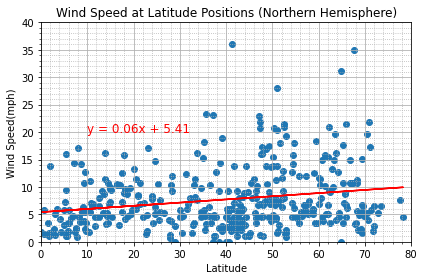

<Figure size 432x288 with 0 Axes>

In [79]:
x_values = nothern_hem["lat"]
y_values = nothern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

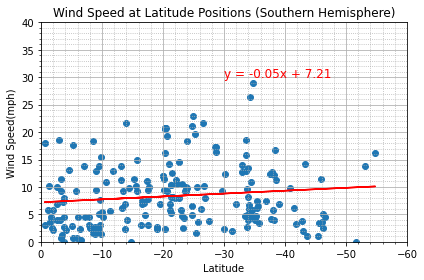

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = southern_hem["lat"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.ylim(0, 40)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("sh_lat_wind_regression.png")